$$
\begin{gather}
G = 6.6743 × 10^{-11} \frac{m^3}{kg s^2}  \simeq 4*10^{-14} \frac{au^3}{M_{\odot}s^2}  \\
H_{0} = 70 h_{70} \frac{km}{s Mpc} = 23*10^{-19} h_{70} \frac{1}{s} \\
1 pc \simeq 3.086 \cdot 10^{16} m\\
1 a.u. = 1.5 \cdot 10^8 km = 4.9 \cdot 10^{-6} pc\\
c = 299 792 458 \frac{m}{s} \simeq  3 \cdot10^{8} \frac{m}{s} = 3* 10^{5} \frac{km}{s}\\
\frac{G^2}{c^7} \simeq 1.21 \cdot 10^{-8} \frac{s^3}{M^2_{\circ}au} \\ 
\text{Factor in amplitude:} \\
\frac{48 \pi}{15}\frac{G^2}{c^7}H_{0} \simeq 2.75 \cdot 10^{-25}  h_{70} \frac{s^2}{M^2_{\circ}au} \\
\end{gather}
$$

In [1]:
@time using FastGaussQuadrature

  2.260793 seconds (196.48 k allocations: 11.077 MiB, 2.91% compilation time)


In [2]:
@time using Distributions

  3.912595 seconds (369.55 k allocations: 22.880 MiB, 1.54% compilation time: 50% of which was recompilation)


In [3]:
@time using Integrals

  5.013825 seconds (479.67 k allocations: 37.510 MiB, 3.62% compilation time: 44% of which was recompilation)


In [4]:
@time using Cubature

  0.313160 seconds (6.01 k allocations: 394.711 KiB)


In [32]:
@time using HCubature

  0.000281 seconds (144 allocations: 10.398 KiB)


In [4]:
@time using Makie

 24.285892 seconds (2.93 M allocations: 186.117 MiB, 1.17% gc time, 0.53% compilation time: 36% of which was recompilation)


In [5]:
@time using CairoMakie

  3.193767 seconds (480.31 k allocations: 29.461 MiB, 0.12% compilation time)


# Stałę Fizyczne

In [6]:
G = 6.67*10.0^(-11) #m^3/(kg s^2)
c = 299792458.0 #m/s
a = G^2/c^7

2.0441216938823637e-80

In [7]:
au = 149597870700.0  # metr
M_Sun = 1.98855*10.0^30  #kg	
pc = 3.08567758128*10.0^16 #m

3.08567758128e16

In [8]:
G1 = G*(1/au)^3*M_Sun # au^3/M_sun/s^2

3.9617413021099175e-14

In [9]:
c1 = c/au #au/s

0.002003988804100004

In [10]:
con = G1^2/c1^7

1.209219633698328e-8

G in au^3/M_sun/s^2

In [11]:
H0 = 70 # km/s/Mpc

70

In [12]:
H = H0/(pc*10.0^3)

2.2685455027664497e-18

In [13]:
con*H

2.7431697618832357e-26

$$
A = \frac{48 \pi}{15}\frac{G^2}{c^7}H_{0}
$$

In [14]:
A = con*H*(48.0*pi)/15.0

2.757735030874251e-25

In [15]:
exp(-10.0^2*0.1)

4.5399929762484854e-5

# Distributions

In [16]:
function fun(e)
    y = sqrt(e^2 -1)
    nom = 1 - y^2 + 4*y^4
    denom = y*(1 + y^2)^2
    return nom/denom
end

fun (generic function with 1 method)

Qudrature 



$$
\begin{gather}
\Omega(f) = \frac{48\pi}{15}\frac{G^2}{c^7}H_0\frac{\Omega^2_{DM}a f_{PBH}^2 (e^2 -1)}{\sqrt{\Omega_{M}}}f^2\Delta^2 \int\int f(m_1)f(m_2) e^{-2\xi x_0}\left(\frac{1 - y^2 +4y^4 + \frac{3}{2}\frac{x_0}{\xi}y^6}{y(1+y^2)^2}\right) dm_1 dm_2   =  \\
\frac{48\pi}{15}\frac{G^2}{c^7}H_0\frac{\Omega^2_{DM}a f_{PBH}^2 (e^2 -1)}{\sqrt{\Omega_{M}}}f^2\Delta^2  \mu^2e^{\sigma^2}\int\int e^{-t_1^2 - t_2^2}\times \exp\left[ -\frac{4\pi f \xi(y)G}{v^3} \mu e^{\sigma^2}\left(e^{- \sqrt{2}\sigma t_1}  + e^{- \sqrt{2}\sigma t_1}\right) \right]  \times \\
\left(\frac{1 - y^2 + 4 y^4  + \frac{3 \pi f G y^6}{ \xi(y) v^3}  \mu e^{\sigma^2} \left(e^{- \sqrt{2}\sigma t_1}  + e^{- \sqrt{2}\sigma t_1}\right) }{y (1+y^2)^2} \right) dt_1 dt_2 
\end{gather}
$$

$$
\begin{gather}
\frac{48\pi}{15}\frac{G^2}{c^7}H_0\frac{\Omega^2_{DM}a f_{PBH}^2 }{\sqrt{\Omega_{M}}}f^2\Delta^2  \mu^2e^{\sigma^2}\int\int e^{-t_1^2 - t_2^2}\times \exp\left[ -\frac{4\pi f \xi(y)a^{3/2}}{\sqrt{G\mu}\sqrt{e^{-\sqrt{2}\sigma t_1} + e^{-\sqrt{2}\sigma t_2}}} e^{-\frac{\sigma^2}{2}} \right]  \times \\
y\left(\frac{1 - y^2 + 4 y^4  + \frac{3 \pi f  y^6  a^{3/2}}{ \xi(y) \sqrt{G \mu}}   e^{-\sigma^2 /2} \sqrt{\left(e^{- \sqrt{2}\sigma t_1}  + e^{- \sqrt{2}\sigma t_1}\right)}^{-1} }{(1+y^2)^2} \right) dt_1 dt_2 
\end{gather}
$$

In [17]:
function Exponent_Integral(t1::Float64,t2::Float64,f::Float64, μ::Float64, σ::Float64,a::Float64, e::Float64)
    y = sqrt(e^2 - 1.0)
    ξ = y - atan(y)  
    
     # masa z rozkłądu po przekształceniu zredukowana)
    M =  exp(-sqrt(2)*σ*t1) + exp(-sqrt(2)*σ*t2) 
    M2 = sqrt(M)^(-1)
      
    power  = -4.0*pi*ξ*a^(3/2)/sqrt(G2*μ)*exp(-σ^2/2)*f
    return C1 = exp(power*M2)
end

Exponent_Integral (generic function with 1 method)

In [194]:
Exponent_Integral(1.0, 1.0, 43.0, 10.0^2, 1.0, 1.0, 1.00001)

0.0008688138595488043

In [299]:
function FGHQ1(f::Float64, μ::Float64, σ::Float64,a::Float64, v::Float64, e::Float64, fbh::Float64,Δ::Float64, N::Int64)
    X, W = gausshermite(N)
    ΩDM = 0.25
    ΩM = 0.3
    
    y = sqrt(e^2 - 1.0)
    ξ = y - atan(y)  
    mean_mass  = μ*exp(σ^2) #Średnia masa r zokąłdu log-normal

    p  = -4.0*pi*ξ*G/v^3
    d  = (3.0*pi*G*y^6)/(ξ*v^3)
    denom = (1+y^2)^2
    E = exp.(-sqrt(2)*σ*X) # masa z rozkłądu po przekształceniu zredukowana)
    M = E .+ E'  # Rozkłąd mas
    B = (W.*W')/denom
    numerator = y*(1 - y^2 + 4y^4) .+ (d*mean_mass)*M
    exponent_factor = (f*mean_mass*p)*M
    
    Amplitude = A*f^2*fbh^2*ΩDM^2*sqrt(ΩM)^(-1)*Δ^2*a
    
    I = sum(B.*numerator.*exp.(exponent_factor) )   
    return Amplitude*I
end

FGHQ1 (generic function with 1 method)

In [18]:
function FGHQ2(f::Float64, μ::Float64, σ::Float64,a::Float64, e::Float64, fbh::Float64,Δ::Float64, N::Int64)
    X, W = gausshermite(N)
    ΩDM = 0.25
    ΩM = 0.3

    y = sqrt(e^2 - 1.0)
    ξ = y - atan(y)  
    
    E = exp.(-sqrt(2)*σ*X) # masa z rozkłądu po przekształceniu zredukowana)
    M = E .+ E' 
    M2 = (sqrt.(M)).^(-1)
      

    power  = -4.0*pi*ξ*a^(3/2)/sqrt(G1*μ)*exp(-σ^2/2)*f
    C1 = exp.(power*M2)
    
    d  = (3.0*pi*f*a^(3/2)*y^6)/(ξ*sqrt(G1*μ))*exp(-σ^2/2)
    denom = (1+y^2)^2
    
    C2 = (W.*W')/denom
    C3 = y*(1 - y^2 + 4y^4) .+ d*M2

    I = sum(C2.*C1.*C1)   
    
    Amplitude = A*f^2*fbh^2*ΩDM^2*sqrt(ΩM)^(-1)*Δ^2*a*μ^2*exp(σ^2)
    return Amplitude*I
end

FGHQ2 (generic function with 1 method)

In [19]:
F_RANGE0 = range(10^(-9), 10^(-7), length = 10^4)

1.0e-9:9.900990099009901e-12:1.0e-7

In [20]:
OMEGA04 = FGHQ2.(F_RANGE0, 10.0^(-5), 1.0, 1.0, 1.1, 1.0, 10.0^5 ,  100)

10000-element Vector{Float64}:
 1.1622180616954849e-43
 1.1801667269233583e-43
 1.1981654245246527e-43
 1.2162125546260412e-43
 1.2343065363749145e-43
 1.2524458077466498e-43
 1.2706288253537956e-43
 1.2888540642571555e-43
 1.3071200177787443e-43
 1.3254251973166044e-43
 1.343768132161466e-43
 1.362147369315216e-43
 1.3805614733111799e-43
 ⋮
 7.676646796071037e-47
 7.671531840039363e-47
 7.666420606824124e-47
 7.661313093481087e-47
 7.656209297068513e-47
 7.651109214647245e-47
 7.646012843280563e-47
 7.640920180034309e-47
 7.635831221976825e-47
 7.630745966178934e-47
 7.625664409713997e-47
 7.620586549657839e-47

$$
\begin{gather}
 \frac{48\pi}{15}\frac{G^2}{c^7}H_0\frac{\Omega^2_{DM}a f_{PBH}^2 (e^2 -1)}{\sqrt{\Omega_{M}}}f^2\Delta^2 m_1m_2 e^{-2\xi x_0(m_1, m_2)}\left(\frac{1 - y^2 +4y^4 + \frac{3}{2}\frac{x_0(m_1,m_2)}{\xi}y^6}{y(1+y^2)^2}\right) \\
 x_0 = 2\pi f \nu_0 = 2\pi f \sqrt{\frac{a^3}{GM}} \\
 f_{max} \simeq = \frac{3}{2 \pi}\sqrt{\frac{GM}{a^3}} y^{-3}
\end{gather}
$$

In [21]:
function Mono_Spect(f, m1, m2, a, e, Δ, fdm) # m1,m2 in Sun mass units and a in au unit !!!!!!!!!
     ## Gravitational cons in au^3/(M_sun * s^2)
    factor1 = 0.8*10^(-12)
    ΩDM = 0.25
    ΩM = 0.3 
    
    y = sqrt(e^2 - 1.0)
    ξ = y - atan(y)  
    M = m1 + m2
    ν0 = sqrt(a^3/(G1*M))
    
    exponent = - 4*ξ*pi*ν0
    s1 = a*exp(exponent*f)
    
    denom = (1+y^2)^2
    num = y*(1 - y^2 + 4y^4 + (3*pi*f*ν0*y^6)/ξ) # redefinicja przez to, że mamy jeszcze (e^2 -1) = y^2
    s2 = num/denom
    return A*f^2*m1*m2*s1*s2*Δ^2*fdm^2
end

function f_max(m1, m2, a,e )
    M = m1 + m2
    n = sqrt((G1*M)/(a^3))
    y = sqrt(e^2 - 1.0)
    return 3/(2*pi)*n/y^3    
end

f_max (generic function with 1 method)

# Spektrum Potęgowe

$$
\begin{gather}
f(m) = A m^{\gamma} \,\,\,\, \gamma \in (-1,1) \\
\Omega(f) = \frac{48\pi}{15}\frac{G^2}{c^7}H_0\frac{\Omega^2_{DM}a f_{PBH}^2 (e^2 -1)}{\sqrt{\Omega_{M}}}f^2\Delta^2 A^2\int\int_{M_1}^{M_2} (m_1m_2)^{\gamma} e^{-2\xi x_0}\left(\frac{1 - y^2 +4y^4 + \frac{3}{2}\frac{x_0}{\xi}y^6}{y(1+y^2)^2}\right) dm_1 dm_2   =  \\
x = \frac{m - M_1}{M_2 - M_1} \iff m = (M_2 - M_1)x + M_1 = D*x + M_1  \\
\Omega(f) \sim \int\int_{0}^{1} ((D*x_1 + M_1)*(D*x_2 + M_1 ))^{\gamma} e^{-4 \pi \xi f \sqrt{\frac{a^3}{GM}}}\left(\frac{1 - y^2 +4y^4 + \frac{3}{2}\frac{x_0}{\xi}y^6}{y(1+y^2)^2}\right) D^2 dx_1 dx_2  \\
\end{gather}
$$

In [56]:
function Spectrum_Power(u,p)
    x = u[1]
    y = u[2]

    f = p[1]
    M_max = p[2]
    M_min = p[3]
    Δ = M_max - M_min
    
    γ = p[4]
    B = γ/(M_max^γ - M_min^γ) 
    e = p[5]
    a = p[6]
    y = sqrt(e^2 -1.0)
    ξ = y - atan(y)

    ΩDM = p[7]
    ΩM = p[8]
    fpbh =p[9]
    δ = p[10]
    
    Amplitude= A*ΩDM^2/sqrt(ΩM)*a*fpbh^2*δ^2*B^2*f^2
    
    C1 = ((Δ*x + M_min)*(Δ*y + M_min))^γ

    factor = -4.0*pi*ξ*f*sqrt(a^3/G1)
    C2 = exp(factor/(Δ*(x+y) +2*M_min))

    num = y*(1 - y^2 + 4.0*y^4 + 3.0*y^6/(2.0*ξ)*sqrt(a^3/G1/(Δ*(x+y) +2*M_min))) 
    den =  (1 + y^2)^2
    C3 = num/den

    return Amplitude*C1*C2*C3
end 

Spectrum_Power (generic function with 1 method)

In [64]:
function Spectrum_Power2(u,p)
    x = u[1]
    y = u[2]

    f = p[1]
    M_max = p[2]
    
    γ = p[3]
    e = p[4]
    a = p[5]
    y = sqrt(e^2 - 1.0)
    ξ = y - atan(y)

    ΩDM = p[6]
    ΩM = p[7]
    fpbh =p[8]
    δ = p[9]
    
    Amplitude= A*ΩDM^2/sqrt(ΩM)*a*fpbh^2*δ^2*γ^2*f^2
    
    C1 = (x*y)^γ

    factor = -4.0*pi*ξ*f*sqrt(a^3/G1)
    C2 = exp(factor/sqrt(M_max*(x+y)))

    num = y*( 1.0 - y^2 + 4.0*y^4 + 1.5*y^6/ξ*sqrt(a^3/(G1*M_max*(x+y)))) 
    den =  (1 + y^2)^2
    C3 = num/den

    return Amplitude*C1*C2*C3
end 

Spectrum_Power2 (generic function with 1 method)

In [91]:
parametry = [ 10.0^(-3) ,10.0^(-2),0.5,1.1,1.0,0.25,0.3,1.0,10.0^5]

9-element Vector{Float64}:
      0.001
      0.010000000000000002
      0.5
      1.1
      1.0
      0.25
      0.3
      1.0
 100000.0

In [95]:
Spectrum_Power2([0.1,0.1],parametry)

0.0

In [102]:
exp(-4.0*pi*1000000.0*sqrt(1.0/(G1*100000000000000.0)))

0.0

In [38]:
domain = (zeros(2), ones(2))

([0.0, 0.0], [1.0, 1.0])

In [50]:
IntProb = IntegralProblem(Spectrum_Power, domain, parametry)

IntegralProblem. In-place: false


In [51]:
Sol = solve(IntProb, HCubatureJL(),abstol = 1e-10, reltol = 1e-3)

retcode: Success
u: 0.0

# Robimy figury dla spektrum

In [51]:
FIG = Figure(size = (1000,1000))
Ax1 = Axis(FIG[1,1])
lines!(Ax1, F_RANGE, OMEGA_RANGE, label = " M = 10^20",color = :red)
lines!(Ax1, F_RANGE, OMEGA_RANGE2, label = " M = 10^22",color = :blue)
lines!(Ax1, F_RANGE, OMEGA_RANGE3, label = " M = 10^18",color = :green)
Ax2 = Axis(FIG[2,1], yscale = log10)
lines!(Ax2, F_RANGE2, OMEGA_RANGE21, label = " e = 1.01",color = :red)
lines!(Ax2, F_RANGE2, OMEGA_RANGE22, label = " e = 1.5",color = :blue)
lines!(Ax2, F_RANGE2, OMEGA_RANGE23, label = " e = 1.2",color = :green)

Lines{Tuple{Vector{Point{2, Float64}}}}

In [17]:
function FGHQ_prob(f, μ, σ, v, e, N)
    X, W = gausshermite(N)
    g = 10^(-11)
    y = sqrt(e^2 - 1)
    ξ = y - atan(y)  
    mean_mass  = μ*exp(σ^2) #Średnia masa r zokąłdu log-normal

    p  = -4*pi*ξ*g/v^3
    d  = (3*pi*g*y^6)/(ξ*v^3)
    denom = y*(1+y^2)^2
    E = exp.(-sqrt(2)*σ*X) # masa z rozkłądu po przekształceniu zredukowana)
    M = E .+ E'  # Rozkłąd mas
    B = (W.*W')/denom
    numerator = (1 - y^2 + 4y^4) .+ (d*mean_mass)*M
    exponent_factor = (f*mean_mass*p)*M
    I = sum(B.*numerator.*exp.(exponent_factor) )   
    return I
end

FGHQ_prob (generic function with 1 method)

In [197]:
function prob1(f,μ, σ, e,v)
    p  = -4*pi*(sqrt(e^2 - 1) - atan(sqrt(e^2 - 1)))*10^(-11)/v^3*(μ*exp(σ^2))*f
    return [p,exp(p)]
end

function prob2(f,μ, σ, e,v)
    y = sqrt(e^2 -1)
    ξ = y - atan(y)
    num = 1 - y^2 + 4y^4 + (3*pi*10^(-11)*y^6)/(ξ*v^3)*(μ*exp(σ^2))*f
    den = y*(1+y^2)^2
    return num/den
end

prob2 (generic function with 1 method)

In [36]:
Mono_Spect(10.0^(-7), 10.0^(-5), 10.0^(-5), 0.1 , 1.1, 10.0^5, 1.0)

2.852207949949936e-40

In [39]:
f_max(10.0^(-5), 10.0^(-5), 1.0,1.0001)

0.00015025255852836987

In [341]:
F_RANGE = range(10^(-10), 10^(-5), length = 10^4)

1.0e-10:1.0000900090009e-9:1.0e-5

In [343]:
F_RANGE[argmax(MONO_SPEC1)]

2.2312007200720073e-7

In [211]:
MONO_SPEC2 = Mono_Spect.(F_RANGE, 100.0, 100.0, 1.0 , 1.00005, 10^5,1.0)

10000-element Vector{Float64}:
 5.085404754988193e-33
 6.154346858316327e-31
 2.243048046921179e-30
 4.8879255141751406e-30
 8.550067113745033e-30
 1.3229472871782367e-29
 1.8926142814438663e-29
 2.564007696786543e-29
 3.3371275358214167e-29
 4.2119738011636407e-29
 5.188546495428366e-29
 6.266845621230744e-29
 7.446871181185922e-29
 ⋮
 5.074656304996662e-23
 5.075672539822775e-23
 5.0766888764014147e-23
 5.077705314732583e-23
 5.078721854816286e-23
 5.0797384966525254e-23
 5.080755240241299e-23
 5.081772085582614e-23
 5.0827890326764734e-23
 5.083806081522876e-23
 5.084823232121828e-23
 5.085840484473332e-23

## fraction change, M = 10^(-5) MSun

In [212]:
F_RANGE2 = range(10.0^(-9), 10.0^(-6),length = 10000)

1.0e-9:9.990999099909991e-11:1.0e-6

In [231]:
MONO_SPEC21 = Mono_Spect.(F_RANGE2, 10.0^(-5), 10.0^(-5), 1.0 , 1.01, 10^5,1.0)
MONO_SPEC22 = Mono_Spect.(F_RANGE2, 10.0^(-5), 10.0^(-5), 1.0 , 1.01, 10^5,0.5)
MONO_SPEC23 = Mono_Spect.(F_RANGE2, 10.0^(-5), 10.0^(-5), 1.0 , 1.01, 10^5,0.1)
MONO_SPEC24 = Mono_Spect.(F_RANGE2, 10.0^(-5), 10.0^(-5), 1.0 , 1.01, 10^5,0.01)

10000-element Vector{Float64}:
 7.339957757196812e-48
 8.943847682945386e-48
 1.0718344141409889e-47
 1.2666499098446556e-47
 1.4791346539834202e-47
 1.7095902532817742e-47
 1.9583165287486056e-47
 2.2256115217984535e-47
 2.511771500356272e-47
 2.8170909649457345e-47
 3.141862654761132e-47
 3.486377553722893e-47
 3.850924896516757e-47
 ⋮
 1.1258179466261687e-45
 1.124663002716987e-45
 1.123509210156188e-45
 1.1223565678379851e-45
 1.121205074657606e-45
 1.1200547295112812e-45
 1.1189055312962471e-45
 1.1177574789107561e-45
 1.1166105712540548e-45
 1.1154648072264045e-45
 1.1143201857290642e-45
 1.1131767056642966e-45

In [217]:
a1 = F_RANGE2[argmax(MONO_SPEC22)]

2.227002700270027e-7

In [215]:
F_RANGE[argmax(MONO_SPEC2)]

1.0e-5

# eccentricty change

In [280]:
f_max(100.0,100.0, 1.0, 1.0001)

0.47459137974589527

In [275]:
F_RANGE3 = range(10.0^(-5), 10.0^(-2),length = 100000)

1.0e-5:9.990099900999012e-8:0.010000000000000002

In [276]:
MONO_SPEC31 = Mono_Spect.(F_RANGE3, 0.1, 0.1, 0.1 , 1.1, 10^5,0.1)
MONO_SPEC32 = Mono_Spect.(F_RANGE3, 1.0, 1.0, 0.1 , 1.1, 10^5,0.1)
MONO_SPEC33 = Mono_Spect.(F_RANGE3, 10.0, 10.0, 0.1 , 1.1, 10^5,0.1)
MONO_SPEC34 = Mono_Spect.(F_RANGE3, 100.0, 100.0, 0.1 , 1.1, 10^5,0.1)

100000-element Vector{Float64}:
 2.0034662892455712e-24
 2.0482266936851266e-24
 2.0935630820663815e-24
 2.1394778766294417e-24
 2.1859734951348854e-24
 2.233052350868472e-24
 2.2807168526458483e-24
 2.3289694048172537e-24
 2.3778124072722078e-24
 2.4272482554442216e-24
 2.477279340315468e-24
 2.5279080484214795e-24
 2.5791367618558307e-24
 ⋮
 1.629080682431612e-33
 1.6284726895387474e-33
 1.6278649230696864e-33
 1.6272573829403407e-33
 1.6266500690665896e-33
 1.626042981364361e-33
 1.6254361197496096e-33
 1.6248294841383497e-33
 1.6242230744465826e-33
 1.623616890590388e-33
 1.623010932485829e-33
 1.622405200049046e-33

In [277]:
a31 = F_RANGE3[argmax(MONO_SPEC31)]
a32 = F_RANGE3[argmax(MONO_SPEC32)]
a33 = F_RANGE3[argmax(MONO_SPEC33)]
a34 = F_RANGE3[argmax(MONO_SPEC34)]

0.0007340824408244084

In [278]:
FIG = Figure(size = (1000,1000))
Ax11 = Axis(FIG[1,1] ,title = L" \Omega(f)\,\, \text{dla monochromatyncznego rozkładu mas}", xlabel = "f[Hz]", ylabel = L"\Omega(f)", xscale = log10, yscale = log10)
l11 = lines!( F_RANGE, MONO_SPEC1,label = L"10^{-10}  M_{\odot}", color = :red)
l12 = lines!( F_RANGE, MONO_SPEC2,label = L"10^{-5} M_{\odot}", color = :blue)
axislegend(Ax11)

Ax21 = Axis(FIG[2,1], title =  L" \Omega(f) \,\,\, \text{dla mas} \,\, M \sim 10^{-5} M_{\odot}", xlabel = "f[Hz]", ylabel = L"\Omega(f)",xscale = log10, yscale = log10)
l21 = lines!( F_RANGE2, MONO_SPEC21,label = L"f_{PBH} = 1.0", color = :red)
l22 = lines!( F_RANGE2, MONO_SPEC22,label = L"f_{PBH} = 0.5", color = :blue)
l23 = lines!( F_RANGE2, MONO_SPEC23,label = L"f_{PBH} = 0.1", color = :green)
l24 = lines!( F_RANGE2, MONO_SPEC24,label = L"f_{PBH} = 0.01", color = :grey)
vl2 = vlines!([a1], color = :orange, linestyle = :dash)
axislegend(Ax21, position = :lt)

Ax12 = Axis(FIG[1,2], title =  L"\text{PDF rozkładu log-normalnego} ", xlabel = L"M (M_{\odot})", ylabel = L"\Omega(f)",xscale = log10, yscale = log10)
l31 = lines!( F_RANGE3, MONO_SPEC31, label = L"M_{PBH} = 0.1", color = :red)
l32 = lines!( F_RANGE3, MONO_SPEC32, label = L"M_{PBH} = 1.0", color = :blue)
l33 = lines!( F_RANGE3, MONO_SPEC33, label = L"M_{PBH} = 10.0", color = :green)
l34 = lines!( F_RANGE3, MONO_SPEC34, label = L"M_{PBH} = 100.0", color = :grey)
vl32 = vlines!([a32], color = :blue, linestyle = :dash)
vl33 = vlines!([a33], color = :green, linestyle = :dash)
vl34 = vlines!([a34], color = :grey, linestyle = :dash)
axislegend(Ax12, position = :rb)

Legend()

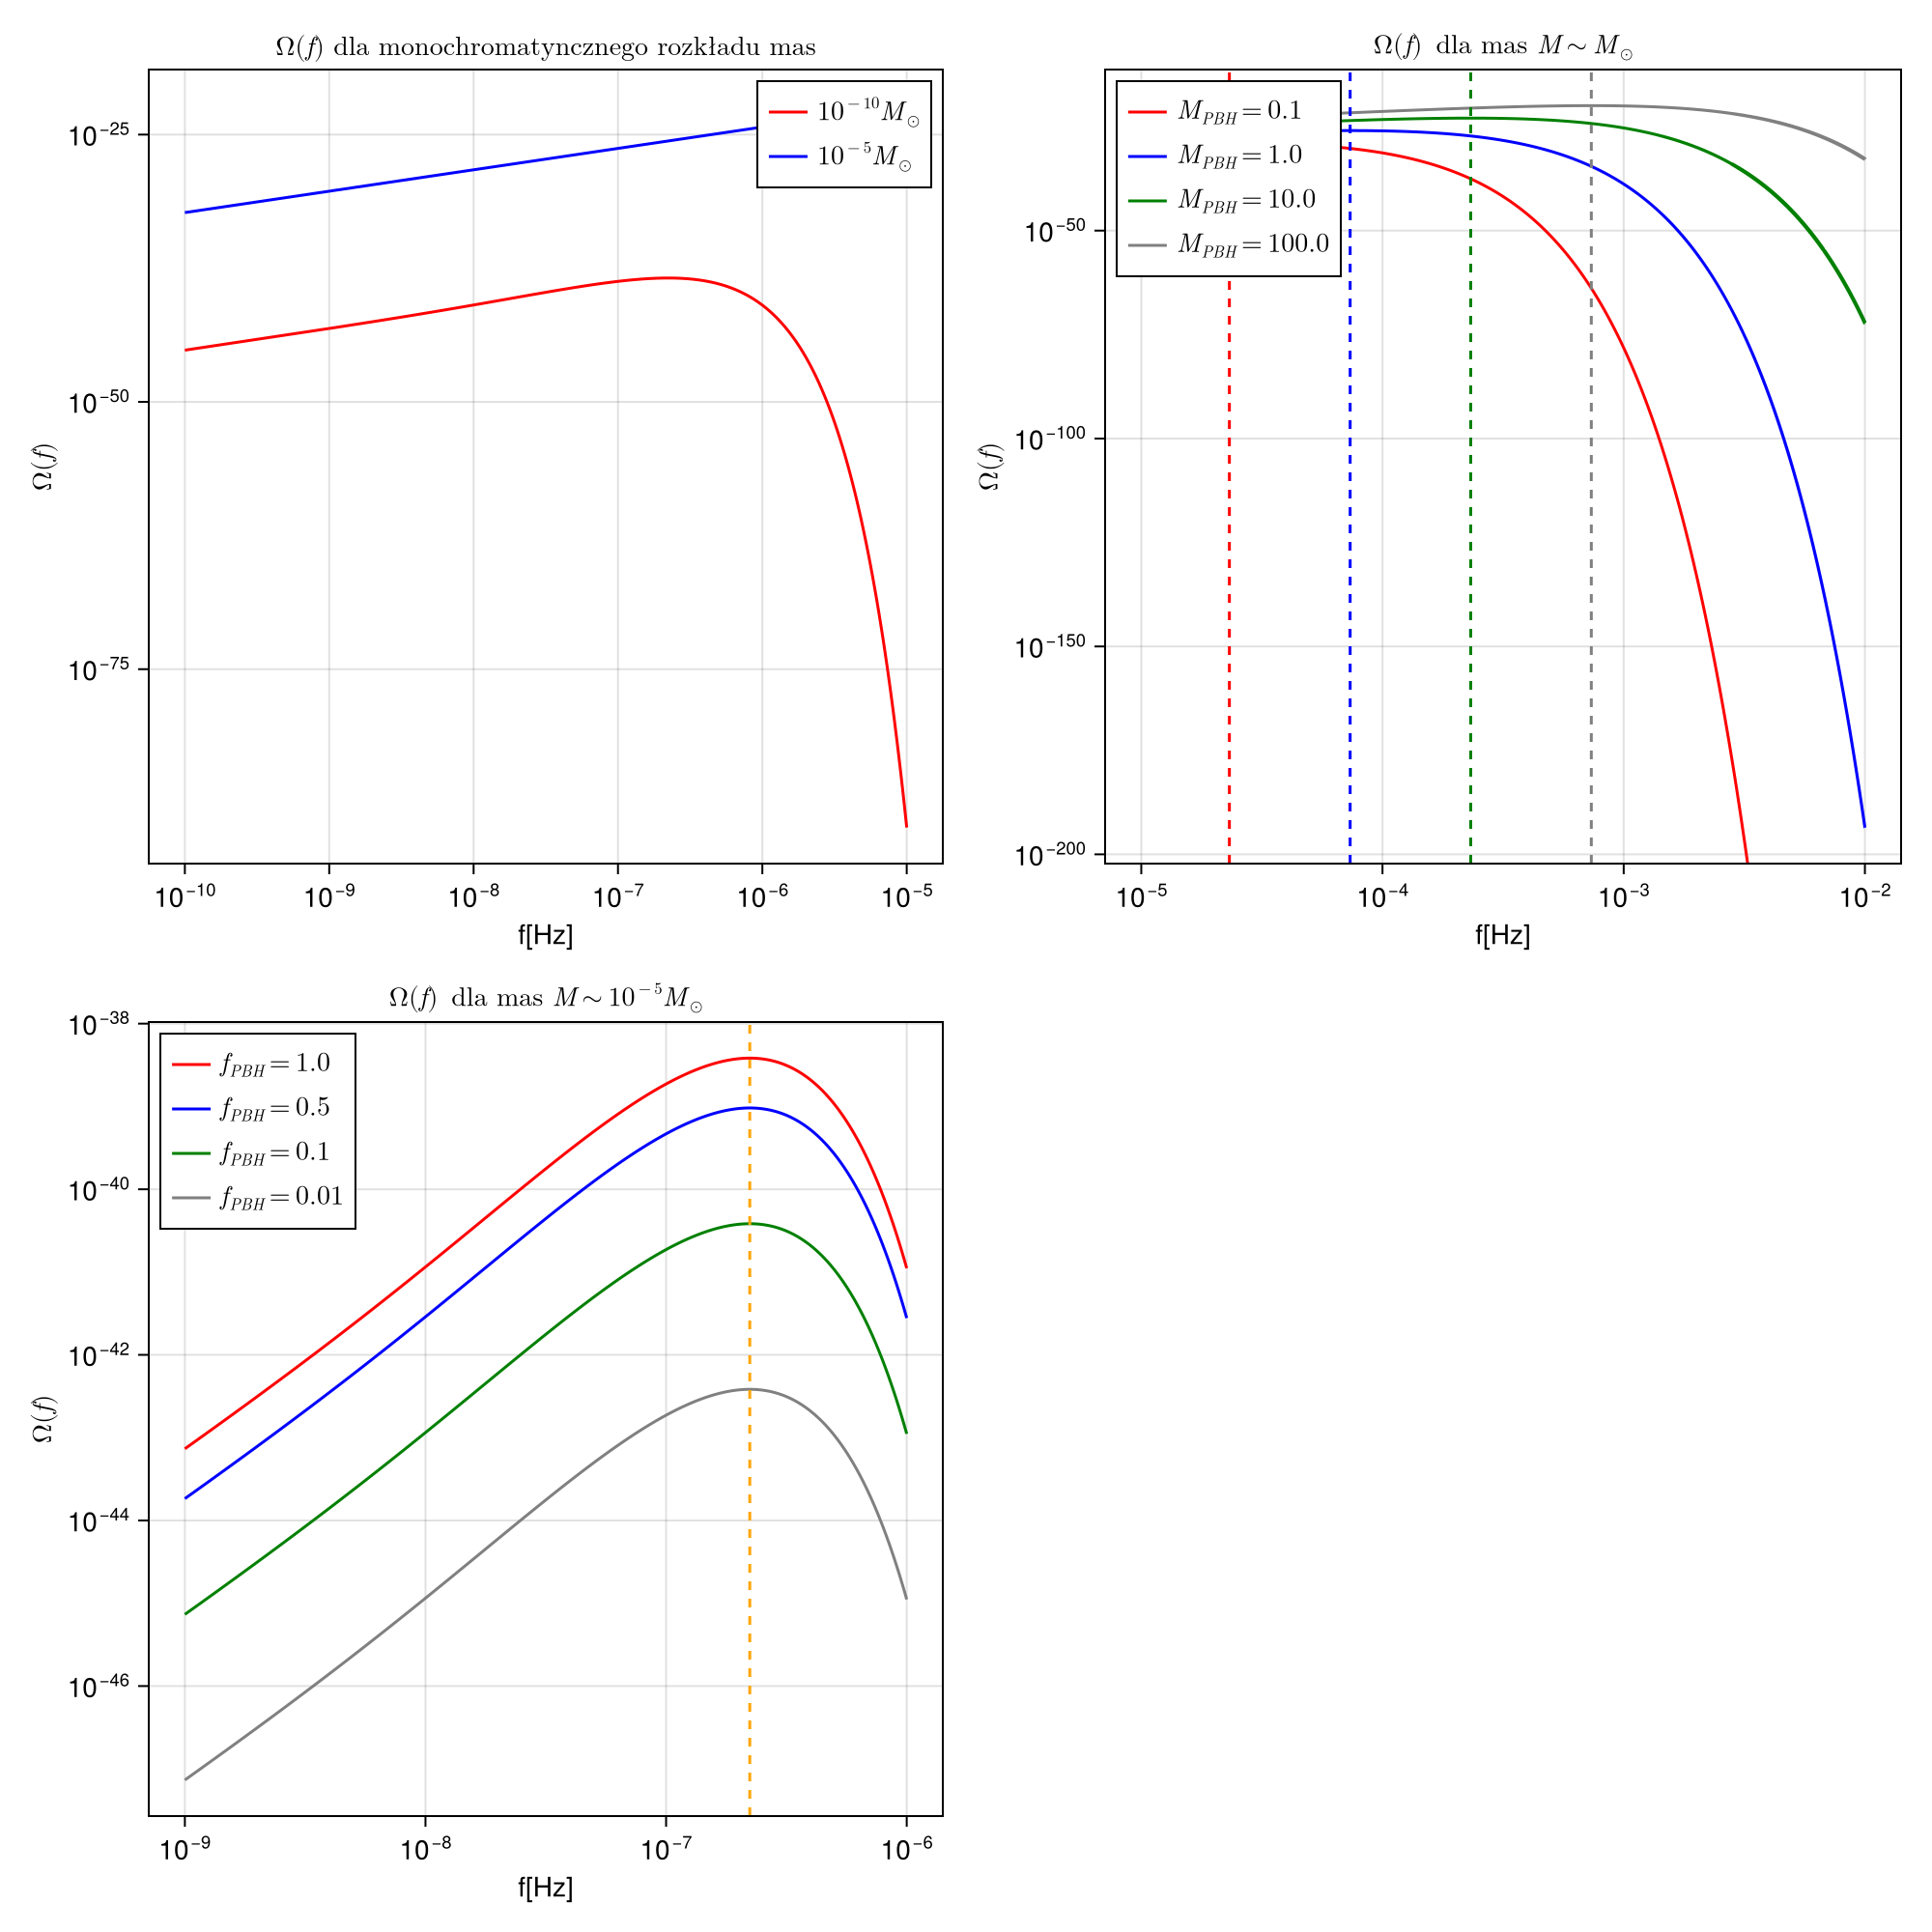

In [279]:
FIG

# M = 10^(-5) 

In [22]:
F_RANGE0 = range(10.0^(-9), 10.0^(-7), length = 10000)

1.0e-9:9.900990099009901e-12:1.0e-7

In [23]:
OMEGA01 = FGHQ2.(F_RANGE0, 10.0^(-5), 0.1, 1.0, 1.1, 1.0, 10.0^5 ,  100)
OMEGA02 = FGHQ2.(F_RANGE0, 10.0^(-5), 0.4, 1.0, 1.1, 1.0, 10.0^5 ,  100)
OMEGA03 = FGHQ2.(F_RANGE0, 10.0^(-5), 0.7, 1.0, 1.1, 1.0, 10.0^5 ,  100)
OMEGA04 = FGHQ2.(F_RANGE0, 10.0^(-5), 1.0, 1.0, 1.1, 1.0, 10.0^5 ,  100)
OMEGA05 = FGHQ2.(F_RANGE0, 10.0^(-5), 2.0, 1.0, 1.1, 1.0, 10.0^5 ,  100)

10000-element Vector{Float64}:
 3.326042830603223e-42
 3.3889023255057804e-42
 3.452288397952246e-42
 3.5161994438154164e-42
 3.58063386423181e-42
 3.645590065578835e-42
 3.7110664594521016e-42
 3.777061462642869e-42
 3.843573497115627e-42
 3.910600989985796e-42
 3.9781423734975895e-42
 4.046196085001968e-42
 4.1147605669347625e-42
 ⋮
 7.607965202670685e-40
 7.607876568954124e-40
 7.607787889594908e-40
 7.607699164609279e-40
 7.607610394013465e-40
 7.607521577823702e-40
 7.607432716056209e-40
 7.607343808727204e-40
 7.607254855852902e-40
 7.607165857449503e-40
 7.60707681353322e-40
 7.606987724120249e-40

In [24]:
f01 =F_RANGE0[argmax(OMEGA01)]
f02 =F_RANGE0[argmax(OMEGA02)]
f03 =F_RANGE0[argmax(OMEGA03)]
f04 =F_RANGE0[argmax(OMEGA04)]
f05 =F_RANGE0[argmax(OMEGA05)]

8.523762376237623e-8

In [25]:
MONO_SPEC0 = Mono_Spect.(F_RANGE0, 10.0^(-5), 10.0^(-5), 1.0 , 1.1, 10.0^5,1.0)

10000-element Vector{Float64}:
 2.5377551984915207e-43
 2.597863745491574e-43
 2.658728503725411e-43
 2.7203488087920907e-43
 2.7827239190308534e-43
 2.8458530166091276e-43
 2.9097352086005503e-43
 2.9743695280530515e-43
 3.0397549350470963e-43
 3.105890317744126e-43
 3.1727744934253267e-43
 3.24040620952074e-43
 3.3087841446288307e-43
 ⋮
 9.586571068116593e-55
 9.551217592107159e-55
 9.51599421320101e-55
 9.480900453743797e-55
 9.445935837831054e-55
 9.41109989130119e-55
 9.37639214172921e-55
 9.341812118420611e-55
 9.307359352405148e-55
 9.273033376429935e-55
 9.238833724953817e-55
 9.204759934140805e-55

In [26]:
f00 = F_RANGE0[argmax(MONO_SPEC0)]

7.346534653465346e-9

In [47]:
FIG2 = Figure(size = (1000,500))
AX21 = Axis(FIG2[1,1], title =  L" \Omega(f) \,\,\, \text{dla log-norm rozkładu mas z medianą } \,\, \mu = 10^{-5}", xlabel = "f[Hz]", ylabel = L"\Omega(f)",xscale = log10, yscale = log10)
L01 = lines!( F_RANGE0, MONO_SPEC0,label = L"\text{Monochromatyczny rozkład}", color = :black)
L21 = lines!( F_RANGE0, OMEGA01,label = L"\sigma = 0.1", color = :red)
L22 = lines!( F_RANGE0, OMEGA02,label = L"\sigma = 0.4", color = :blue)
L23 = lines!( F_RANGE0, OMEGA03,label = L"\sigma = 0.7", color = :green)
L24 = lines!( F_RANGE0, OMEGA04,label = L"\sigma = 1.0", color = :teal)
L25 = lines!( F_RANGE0, OMEGA05,label = L"\sigma = 2.0", color = :violet)
vl10 = vlines!([f00], color = :black, linestyle = :dash)
vl11 = vlines!([f01], color = :red, linestyle = :dash)
vl12 = vlines!([f02], color = :blue ,linestyle = :dash)
vl13 = vlines!([f03], color = :green , linestyle = :dash)
vl14 = vlines!([f04], color = :teal, linestyle = :dash)
vl15 = vlines!([f05], color = :violet, linestyle = :dash)
axislegend(AX21, position = :lb)

AX12 = Axis(FIG2[1,2], title =  L" \text{PDF rozkładu log-norm}", xlabel = L"M[M_{\odot}]", ylabel = "PDF",xscale = log10)
L31 = lines!( LogNormal(-5.0*log(10.0), 0.1), label = L"\sigma = 0.1", color = :red)
L32 = lines!( LogNormal(-5.0*log(10.0), 0.4), label = L"\sigma = 0.4", color = :blue)
L33 = lines!( LogNormal(-5.0*log(10.0), 0.7), label = L"\sigma = 0.7", color = :green)
L34 = lines!( LogNormal(-5.0*log(10.0), 1.0), label = L"\sigma = 1.0", color = :teal)
#L35 = lines!( LogNormal(-5.0*log(10.0), 2.0), label = L"\sigma = 2.0", color = :violet)
L35 = lines!( r,rr, label = L"\sigma = 2.0", color = :violet)
xlims!(0.5*10.0^(-7),10^(-4))
axislegend(AX12, position = :lt)

Legend()

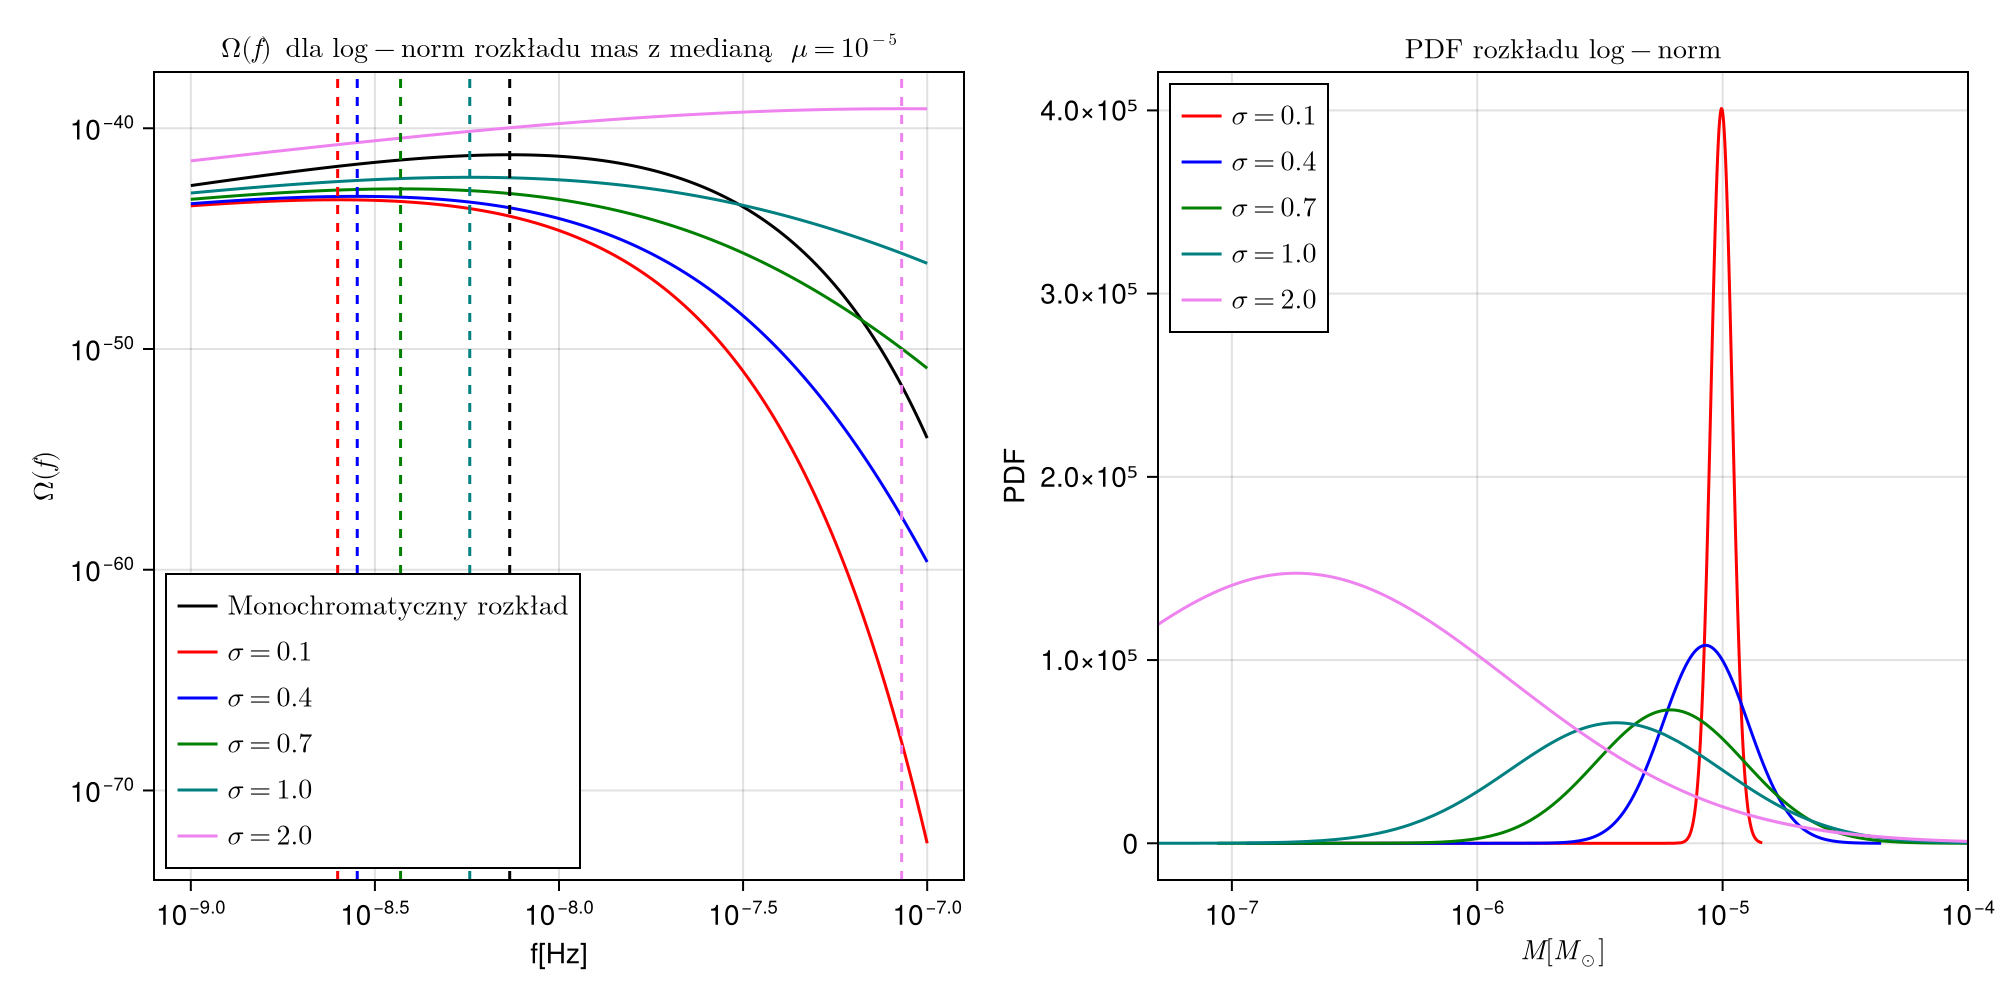

In [48]:
FIG2

In [182]:
save("Plot1.pdf",FIG2)

CairoMakie.Screen{PDF}


In [27]:
PDF1 = LogNormal(-5.0*log(10.0), 2.0)

LogNormal{Float64}(μ=-11.51292546497023, σ=2.0)

In [28]:
r1 = range(10.0^(-8),10^(-4), 10^5)

1.0e-8:9.99909999099991e-10:0.0001

In [31]:
rr = pdf.(PDF1,r1)

100000-element Vector{Float64}:
 51223.805589968455
 54836.04811014559
 58240.1878823412
 61455.23562378513
 64497.78496568052
 67382.38893829443
 70121.87256008449
 72727.5912598025
 75209.64459699663
 77577.05350917611
 79837.90790936205
 81999.49017246444
 84068.37896349952
     ⋮
  1028.3292819554358
  1028.3130792781071
  1028.2968769923882
  1028.2806750982672
  1028.2644735957294
  1028.2482724847646
  1028.232071765358
  1028.2158714374964
  1028.1996715011685
  1028.1834719563599
  1028.1672728030583
  1028.1510740412507

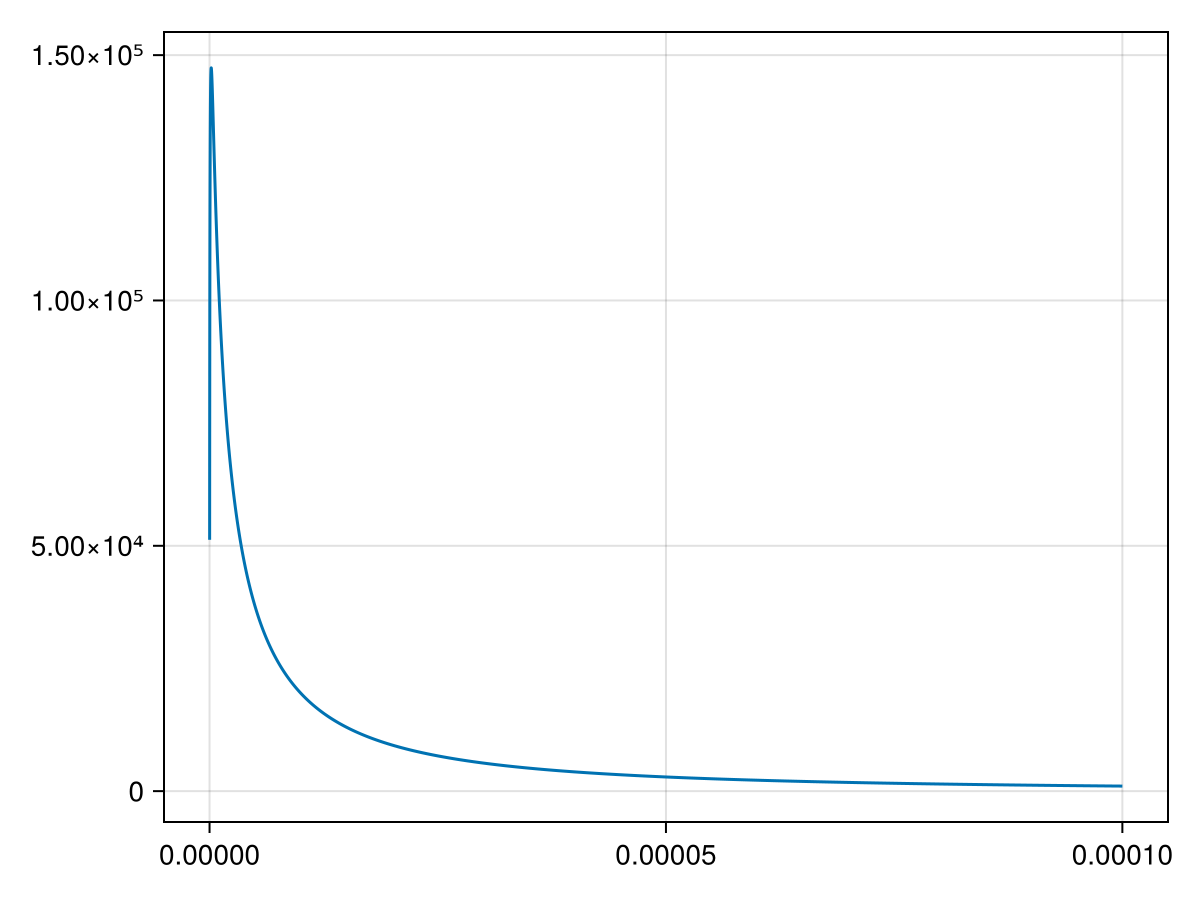

In [33]:
lines(r1,rr)

# M = 10^(-2)

In [34]:
F_RANGE1 = range(10.0^(-9), 10.0^(-4), length = 100000)

1.0e-9:1.0e-9:0.0001

In [35]:
OMEGA11 = FGHQ2.(F_RANGE1, 10.0^(-2), 0.1, 1.0, 1.01, 1.0, 10.0^5 ,  100)
OMEGA12 = FGHQ2.(F_RANGE1, 10.0^(-2), 0.4, 1.0, 1.01, 1.0, 10.0^5 ,  100)
OMEGA13 = FGHQ2.(F_RANGE1, 10.0^(-2), 0.7, 1.0, 1.01, 1.0, 10.0^5 ,  100)
OMEGA14 = FGHQ2.(F_RANGE1, 10.0^(-2), 1.0, 1.0, 1.01, 1.0, 10.0^5 ,  100)
OMEGA15 = FGHQ2.(F_RANGE1, 10.0^(-2), 2.0, 1.0, 1.01, 1.0, 10.0^5 ,  100)

100000-element Vector{Float64}:
 5.186399178014372e-36
 2.0743290236584676e-35
 4.666721448682786e-35
 8.295471460500882e-35
 1.2960233463176536e-34
 1.8660661997133428e-34
 2.539641173907777e-34
 3.316713750192103e-34
 4.19724942347027e-34
 5.181213702251313e-34
 6.268572108641652e-34
 7.459290178337388e-34
 8.753333460616593e-34
 ⋮
 9.857777992866087e-28
 9.85776351227844e-28
 9.857749031124498e-28
 9.857734549404288e-28
 9.85772006711783e-28
 9.857705584265143e-28
 9.857691100846254e-28
 9.857676616861182e-28
 9.857662132309944e-28
 9.857647647192566e-28
 9.857633161509065e-28
 9.85761867525947e-28

In [36]:
f11 =F_RANGE1[argmax(OMEGA11)]
f12 =F_RANGE1[argmax(OMEGA12)]
f13 =F_RANGE1[argmax(OMEGA13)]
f14 =F_RANGE1[argmax(OMEGA14)]
f15 =F_RANGE1[argmax(OMEGA15)]

8.2008e-5

In [37]:
MONO_SPEC1 = Mono_Spect.(F_RANGE1, 10.0^(-2), 10.0^(-2), 1.0 , 1.01, 10^5,1.0) 

100000-element Vector{Float64}:
 3.6970930052975316e-38
 1.4825676236253126e-37
 3.3441629850912146e-37
 5.960073254184887e-37
 9.335866164516566e-37
 1.347709932493999e-36
 1.8389320230433792e-36
 2.4078066272973742e-36
 3.0548864752395725e-36
 3.780723288724946e-36
 4.5858677825643095e-36
 5.470869665607844e-36
 6.436277641827726e-36
 ⋮
 6.95826719441772e-44
 6.955560633651573e-44
 6.952855123576172e-44
 6.950150663784441e-44
 6.947447253869567e-44
 6.944744893424827e-44
 6.942043582043721e-44
 6.939343319319753e-44
 6.936644104846777e-44
 6.933945938218617e-44
 6.931248819029391e-44
 6.928552746873378e-44

In [38]:
f10 =F_RANGE1[argmax(MONO_SPEC1)]

7.05e-6

In [39]:
MONO_SPEC1[argmax(MONO_SPEC1)]

2.083577830737421e-30

In [71]:
FIG3 = Figure(size = (1000,500))
AXIS21 = Axis(FIG3[1,1], title =  L" \Omega(f) \,\,\, \text{dla log-norm rozkładu mas z medianą } \,\, \mu = 10^{-2}", xlabel = "f[Hz]", ylabel = L"\Omega(f)",xscale = log10, yscale = log10)
A20 = lines!( F_RANGE1, MONO_SPEC1,label = L"\text{Monochromatyczny rozkład}", color = :black)
A21 = lines!( F_RANGE1, OMEGA11,label = L"\sigma = 0.1", color = :red)
A22 = lines!( F_RANGE1, OMEGA12,label = L"\sigma = 0.4", color = :blue)
A23 = lines!( F_RANGE1, OMEGA13,label = L"\sigma = 0.7", color = :green)
A24 = lines!( F_RANGE1, OMEGA14,label = L"\sigma = 1.0", color = :teal)
A25 = lines!( F_RANGE1, OMEGA15,label = L"\sigma = 2.0", color = :violet)
vl20 = vlines!([f10], color = :black, linestyle = :dash)
hl20 = hlines!(MONO_SPEC1[argmax(MONO_SPEC1)], color = :black, linestyle = :dash)
text!(F_RANGE[1], MONO_SPEC1[argmax(MONO_SPEC1)], text=L"\textbf{2.1\cdot 10^{-30}}", align=(:left ,:top), color=:black)
vl21 = vlines!([f11], color = :red, linestyle = :dash)
vl22 = vlines!([f12], color = :blue ,linestyle = :dash)
vl23 = vlines!([f13], color = :green , linestyle = :dash)
vl24 = vlines!([f14], color = :teal, linestyle = :dash)
vl25 = vlines!([f15], color = :violet, linestyle = :dash)
axislegend(AXIS21, position = :lb)

AXIS12 = Axis(FIG3[1,2], title =  L" \text{PDF rozkładu log-norm}", xlabel = L"M[M_{\odot}]", ylabel = "PDF")
A31 = lines!( LogNormal(-2.0*log(10.0), 0.1), label = L"\sigma = 0.1", color = :red)
A32 = lines!( LogNormal(-2.0*log(10.0), 0.4), label = L"\sigma = 0.4", color = :blue)
A33 = lines!( LogNormal(-2.0*log(10.0), 0.7), label = L"\sigma = 0.7", color = :green)
A34 = lines!( LogNormal(-2.0*log(10.0), 1.0), label = L"\sigma = 1.0", color = :teal)
xlims!(10.0^(-4),0.025)
axislegend(AXIS12, position = :lt)

Legend()

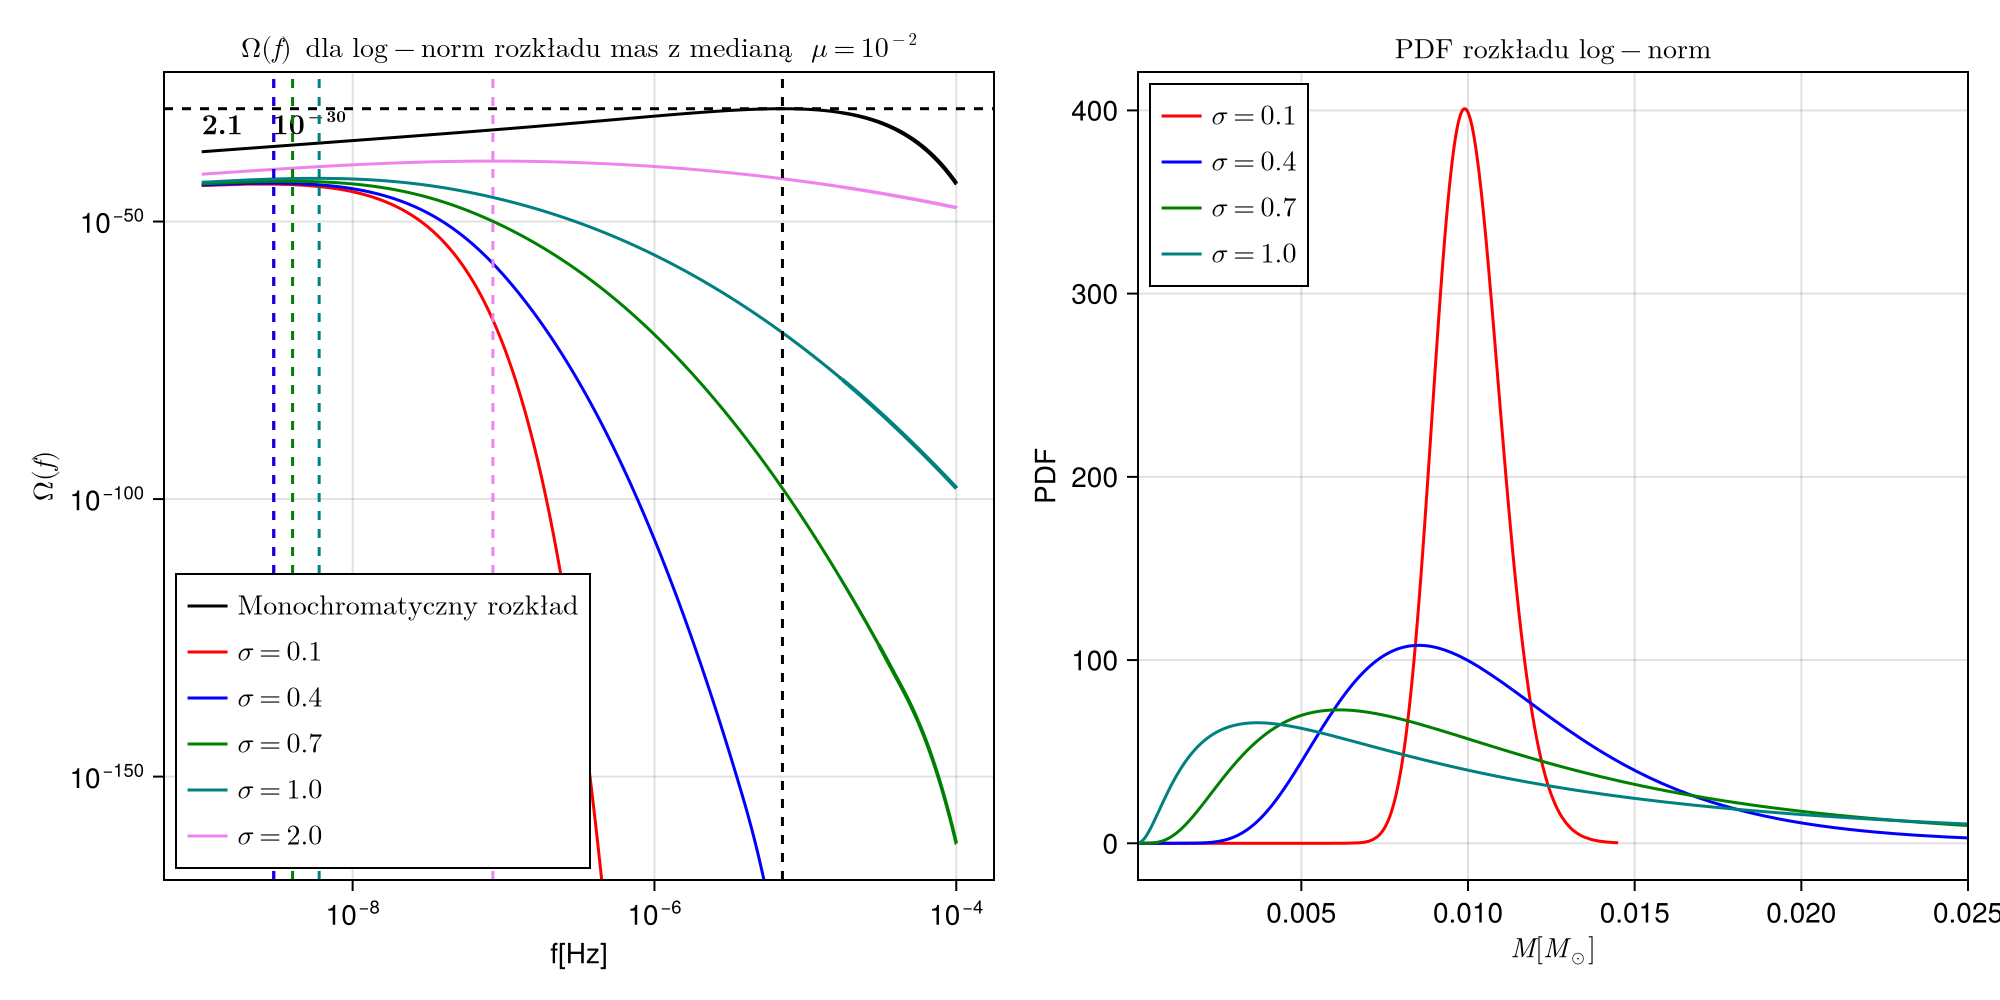

In [72]:
FIG3

In [183]:
save("Plot2.pdf", FIG3)

CairoMakie.Screen{PDF}


In [69]:
FIGURE = Figure(size = (1000,1000))
A1 = FIGURE[1,1]
AX21 = Axis(A1[1,1], title =  L" \Omega(f) \,\,\, \text{dla log-norm rozkładu mas z medianą } \,\, \mu = 10^{-5}", xlabel = L"\text{f[Hz]}", ylabel = L"\Omega(f)",xscale = log10, yscale = log10, xlabelsize = 25, ylabelsize = 25, titlesize = 20,xticklabelsize = 15,yticklabelsize = 15)
L01 = lines!( F_RANGE0, MONO_SPEC0,label = L"\text{Monochromatyczny rozkład}", color = :black)
L21 = lines!( F_RANGE0, OMEGA01,label = L"\sigma = 0.1", color = :red)
L22 = lines!( F_RANGE0, OMEGA02,label = L"\sigma = 0.4", color = :blue)
L23 = lines!( F_RANGE0, OMEGA03,label = L"\sigma = 0.7", color = :green)
L24 = lines!( F_RANGE0, OMEGA04,label = L"\sigma = 1.0", color = :teal)
L25 = lines!( F_RANGE0, OMEGA05,label = L"\sigma = 2.0", color = :violet)
vl10 = vlines!([f00], color = :black, linestyle = :dash)
vl11 = vlines!([f01], color = :red, linestyle = :dash)
vl12 = vlines!([f02], color = :blue ,linestyle = :dash)
vl13 = vlines!([f03], color = :green , linestyle = :dash)
vl14 = vlines!([f04], color = :teal, linestyle = :dash)
vl15 = vlines!([f05], color = :violet, linestyle = :dash)
axislegend(AX21, position = :lb)

AX12 = Axis(A1[1,2], title =  L" \text{PDF rozkładu log-norm}", xlabel = L"M[M_{\odot}]", ylabel = L"\text{PDF}",xscale = log10, xlabelsize = 25, ylabelsize = 25, titlesize = 20,xticklabelsize = 15,yticklabelsize = 15)
L31 = lines!( LogNormal(-5.0*log(10.0), 0.1), label = L"\sigma = 0.1", color = :red)
L32 = lines!( LogNormal(-5.0*log(10.0), 0.4), label = L"\sigma = 0.4", color = :blue)
L33 = lines!( LogNormal(-5.0*log(10.0), 0.7), label = L"\sigma = 0.7", color = :green)
L34 = lines!( LogNormal(-5.0*log(10.0), 1.0), label = L"\sigma = 1.0", color = :teal)
L35 = lines!( r1,rr, label = L"\sigma = 2.0", color = :violet)
xlims!(0.5*10.0^(-7),10^(-4))
axislegend(AX12, position = :lt)

A2 = FIGURE[2,1]
AXIS21 = Axis(A2[1,1], title =  L" \Omega(f) \,\,\, \text{dla log-norm rozkładu mas z medianą } \,\, \mu = 10^{-2}", xlabel = L"\text{f[Hz]}", ylabel = L"\Omega(f)",xscale = log10, yscale = log10, xlabelsize = 25, ylabelsize = 25, titlesize = 20,xticklabelsize = 15,yticklabelsize = 15)
A20 = lines!( F_RANGE1, MONO_SPEC1,label = L"\text{Monochromatyczny rozkład}", color = :black)
A21 = lines!( F_RANGE1, OMEGA11,label = L"\sigma = 0.1", color = :red)
A22 = lines!( F_RANGE1, OMEGA12,label = L"\sigma = 0.4", color = :blue)
A23 = lines!( F_RANGE1, OMEGA13,label = L"\sigma = 0.7", color = :green)
A24 = lines!( F_RANGE1, OMEGA14,label = L"\sigma = 1.0", color = :teal)
A25 = lines!( F_RANGE1, OMEGA15,label = L"\sigma = 2.0", color = :violet)
vl20 = vlines!([f10], color = :black, linestyle = :dash)
hl20 = hlines!(MONO_SPEC1[argmax(MONO_SPEC1)], color = :black, linestyle = :dash)
text!(F_RANGE1[1], MONO_SPEC1[argmax(MONO_SPEC1)], text=L"\textbf{2.1\cdot 10^{-30}}", align=(:left ,:top), color=:black)
vl21 = vlines!([f11], color = :red, linestyle = :dash)
vl22 = vlines!([f12], color = :blue ,linestyle = :dash)
vl23 = vlines!([f13], color = :green , linestyle = :dash)
vl24 = vlines!([f14], color = :teal, linestyle = :dash)
vl25 = vlines!([f15], color = :violet, linestyle = :dash)
axislegend(AXIS21, position = :lb)

AXIS12 = Axis(A2[1,2], title =  L" \text{PDF rozkładu log-norm}", xlabel = L"M[M_{\odot}]", ylabel = L"\text{PDF}", xlabelsize = 25, ylabelsize = 25, titlesize = 20,xticklabelsize = 12,yticklabelsize = 15)
A31 = lines!( LogNormal(-2.0*log(10.0), 0.1), label = L"\sigma = 0.1", color = :red)
A32 = lines!( LogNormal(-2.0*log(10.0), 0.4), label = L"\sigma = 0.4", color = :blue)
A33 = lines!( LogNormal(-2.0*log(10.0), 0.7), label = L"\sigma = 0.7", color = :green)
A34 = lines!( LogNormal(-2.0*log(10.0), 1.0), label = L"\sigma = 1.0", color = :teal)
xlims!(10.0^(-4),0.025)
axislegend(AXIS12, position = :lt)

Legend()

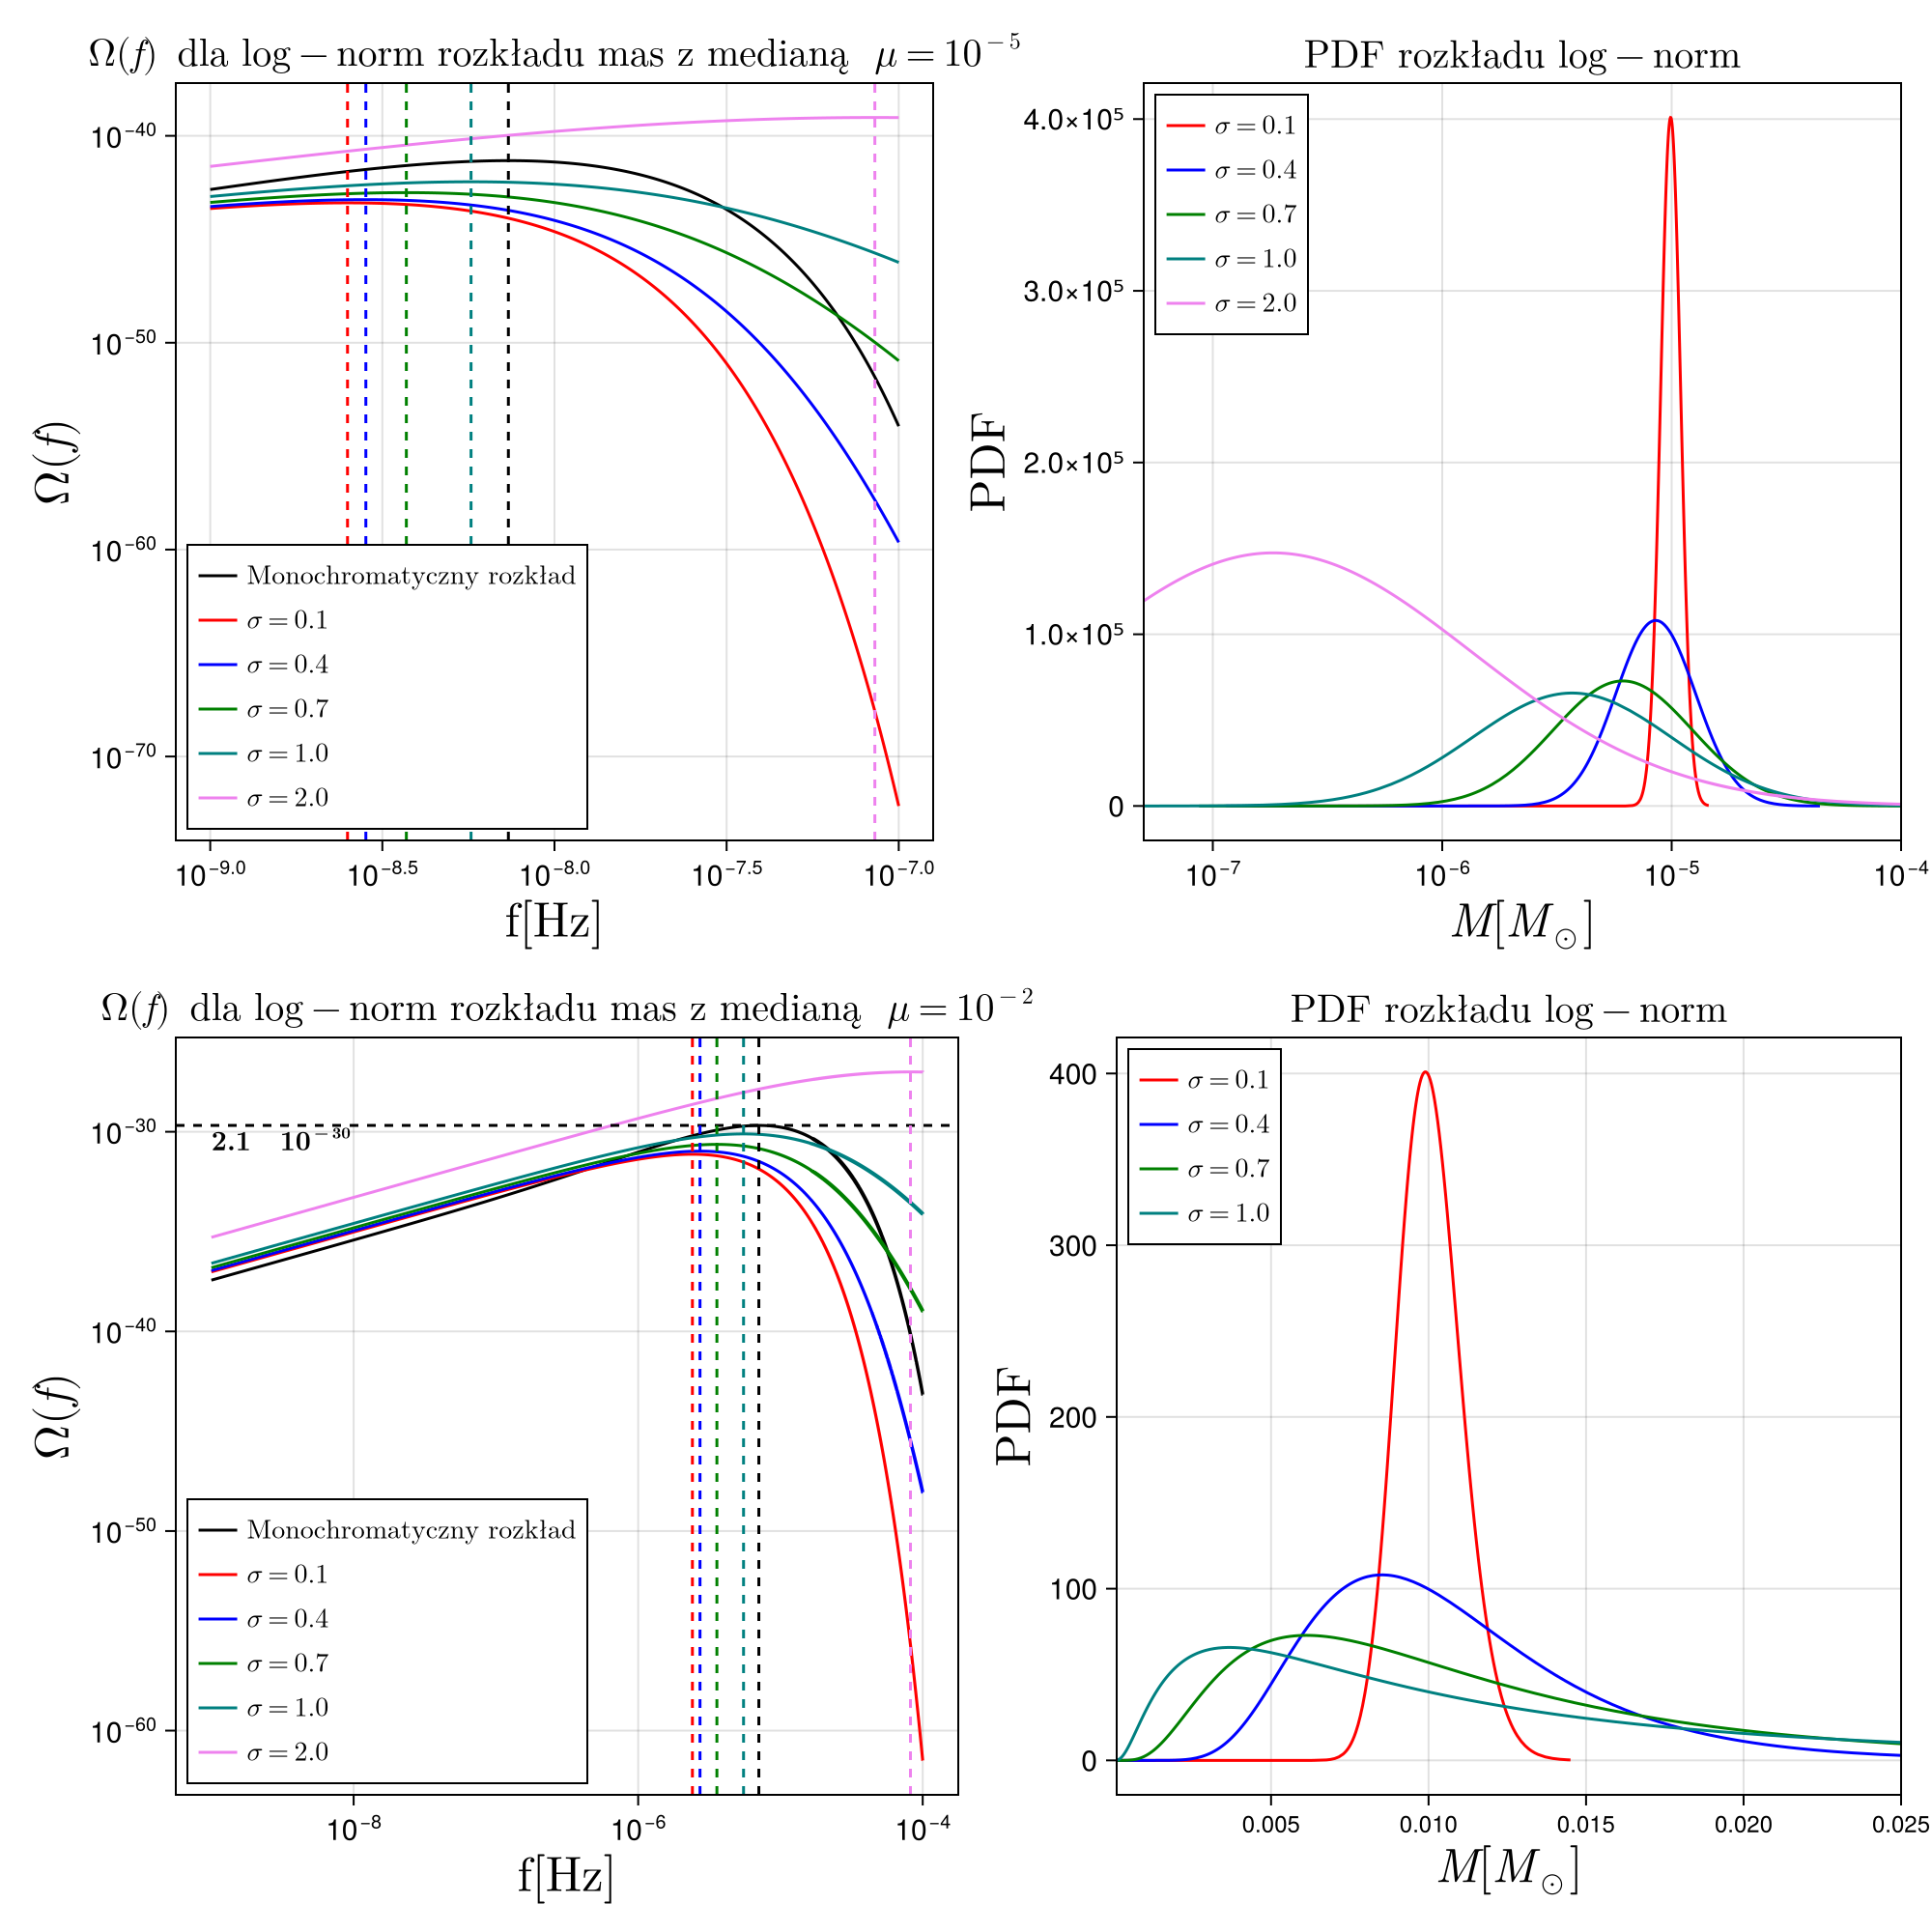

In [71]:
FIGURE

In [72]:
save("Stochastic_Spectrum_Plot.pdf", FIGURE)

CairoMakie.Screen{PDF}
